##Etapa 1: Entendimento do Problema

Proposta para construção de uma segmentação de clientes de um shopping para auxiliar as campanhas de marketing (direcionamento).

##Etapa 2: Coleta de Dados

Onde nos vamos conseguir os dados para resolver nosso problema?

Importando Bibliotecas

In [51]:
pip install sweetviz

In [52]:
#Manipulação de Dados
import pandas as pd
import numpy as np

#Visualizão de Dados
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

#Modelo de Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Leitura do arquivo CSV

In [53]:
df = pd.read_csv("clientes.csv")

Primeira Inspeção nos Dados

In [54]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Etapa 3 - Análise Exploratória dos Dados
Etapa que damos sentido aos dados



*   Limpeza dos Dados
*   Entendimentos das variáveis e das relações entre features
*   Storytelling e Visualização

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [58]:
df.rename(columns={"Spending Score (1-100)": "Score"}, inplace=True)

In [59]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Score'], dtype='object')

In [60]:
df.shape

(200, 5)

In [61]:
linhas, colunas = df.shape

In [62]:
print(linhas)

200


In [63]:
print(colunas)

5


#### Informações Estatísticas

In [64]:
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Score
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [65]:
df.describe(include="all").round(2)

,CustomerID,Gender,Age,Annual Income (k$),Score
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60.56,50.20
std,57.88,NaN,13.97,26.26,25.82
min,1.00,NaN,18.00,15.00,1.00
25%,50.75,NaN,28.75,41.50,34.75
50%,100.50,NaN,36.00,61.50,50.00
75%,150.25,NaN,49.00,78.00,73.00


Dados Faltantes

In [66]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Score                 0
dtype: int64

Drop "CustomerID"

In [67]:
df.drop(columns={"CustomerID"}, inplace=True)

In [68]:
df.head()

,Gender,Age,Annual Income (k$),Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Gender - Gênero dos usuários do Shopping

In [69]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Age - Idade dos usuários do Shopping

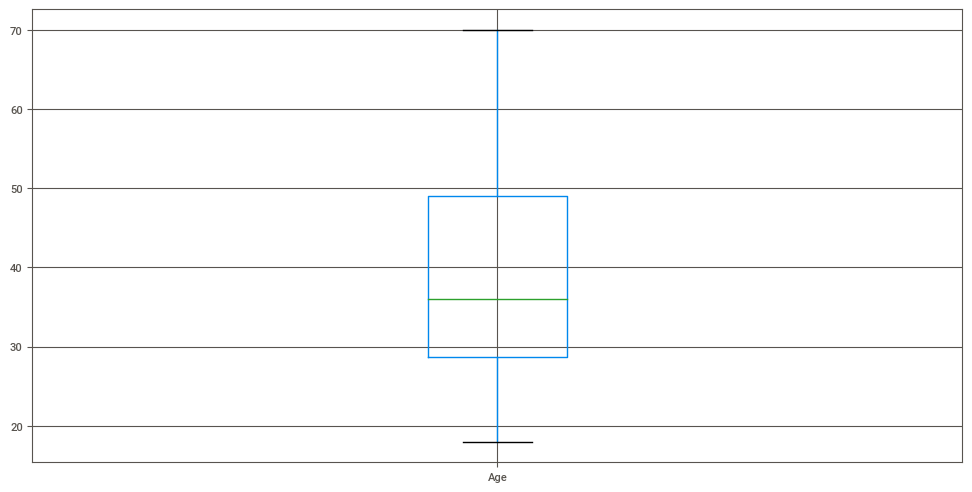

In [71]:
plt.figure(figsize=(12,6))
df.boxplot("Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


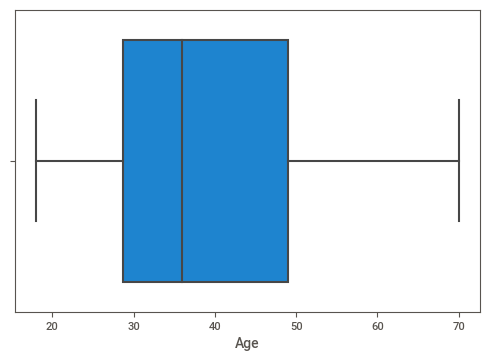

In [72]:
sns.boxplot(df["Age"])
plt.show()

Correlação entre variáveis

In [73]:
df.corr()

,Age,Annual Income (k$),Score
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


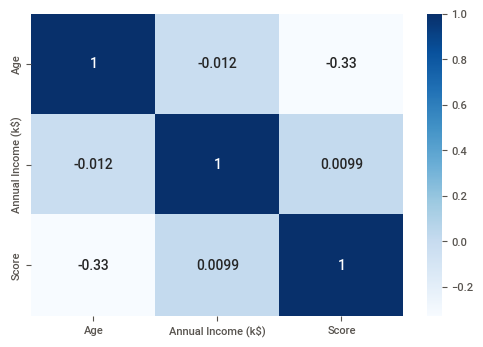

In [74]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

SweetViz

In [75]:
my_viz = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [76]:
my_viz.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##Etapa 3: Modelo de Machine Learning

Precisamos agrupar os clientes do shopping com base em suas informações (atributos)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


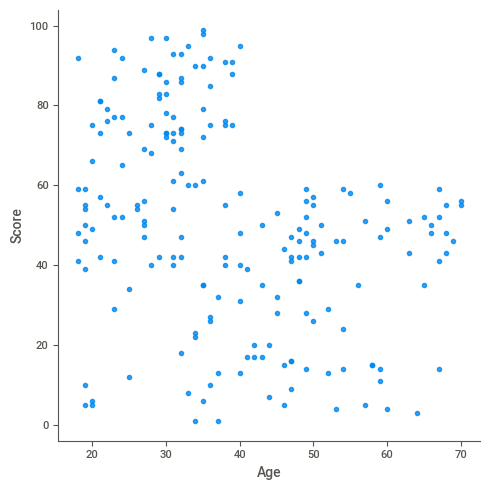

In [77]:
sns.lmplot("Age", "Score", data=df, fit_reg=False, size=5)

In [78]:
df.head()

,Gender,Age,Annual Income (k$),Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [79]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


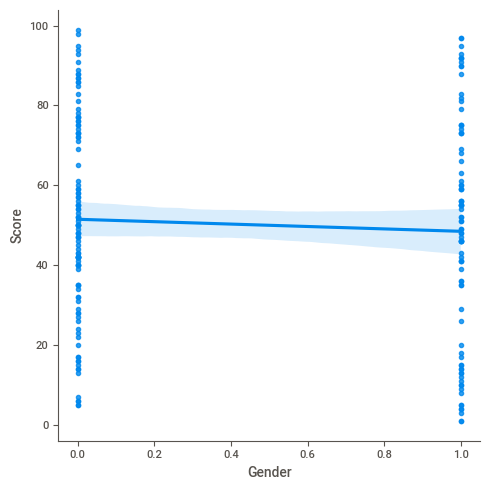

In [81]:
sns.lmplot("Gender", "Score", data=df, size=5)

In [82]:
kmeans = KMeans(n_clusters=3)

In [83]:
print(kmeans)

KMeans(n_clusters=3)


In [84]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [85]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [86]:
df["Cluster_Id"] = kmeans.labels_

In [87]:
df.head()

,Gender,Age,Annual Income (k$),Score,Cluster_Id
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1


In [88]:
df.tail()

,Gender,Age,Annual Income (k$),Score,Cluster_Id
195,0,35,120,79,0
196,0,45,126,28,2
197,1,32,126,74,0
198,1,32,137,18,2
199,1,30,137,83,0


In [89]:
marcadores = ['+', '^','.']

In [90]:
type(marcadores)

list

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


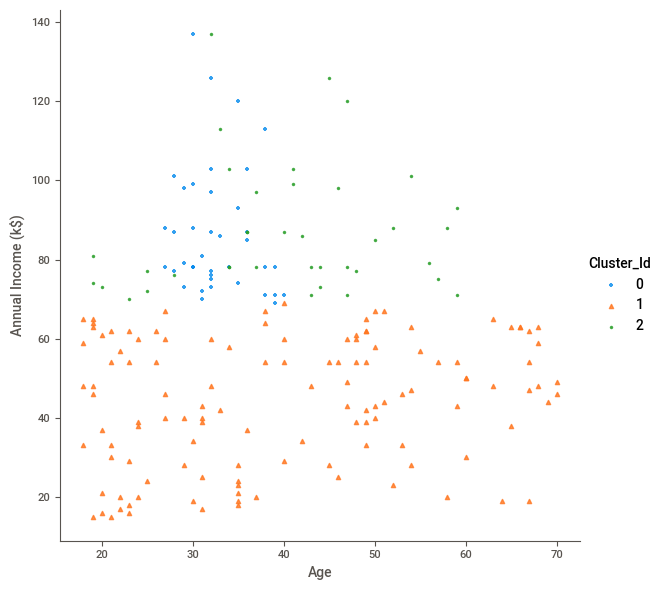

In [91]:
sns.lmplot("Age", "Annual Income (k$)", data=df, hue="Cluster_Id", fit_reg=False, markers=marcadores, height=6)

In [93]:
scaler = StandardScaler()

In [94]:
scaled_df = scaler.fit_transform(df[["Age", "Annual Income (k$)", "Score"]])

In [96]:
new_cluster = KMeans(n_clusters=3)

In [97]:
new_cluster.fit(scaled_df)

KMeans(n_clusters=3)

In [98]:
df["new_id_cluster"] = new_cluster.labels_

In [99]:
df["new_id_cluster"].head()

0    2
1    2
2    2
3    2
4    2
Name: new_id_cluster, dtype: int32

In [100]:
df.head()

,Gender,Age,Annual Income (k$),Score,Cluster_Id,new_id_cluster
0,1,19,15,39,1,2
1,1,21,15,81,1,2
2,0,20,16,6,1,2
3,0,23,16,77,1,2
4,0,31,17,40,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


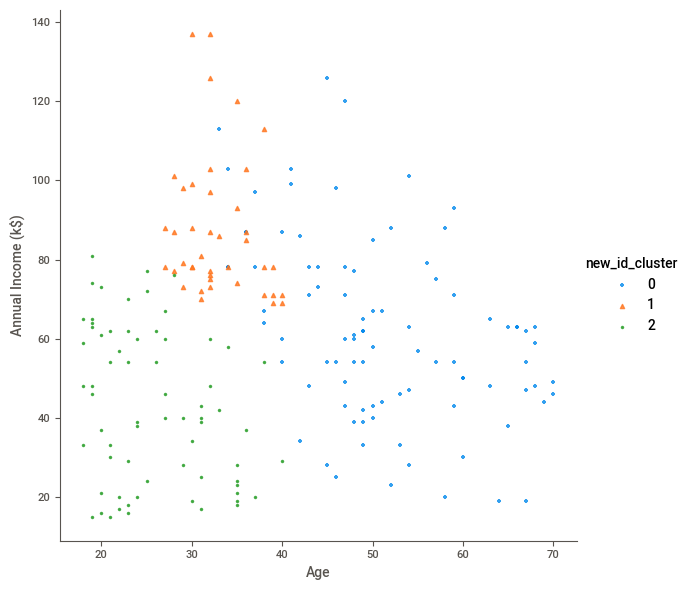

In [101]:
sns.lmplot("Age", "Annual Income (k$)", data=df, hue="new_id_cluster", fit_reg=False, markers=marcadores, height=6)

In [102]:
df.head()

,Gender,Age,Annual Income (k$),Score,Cluster_Id,new_id_cluster
0,1,19,15,39,1,2
1,1,21,15,81,1,2
2,0,20,16,6,1,2
3,0,23,16,77,1,2
4,0,31,17,40,1,2


In [103]:
df.groupby('new_id_cluster')["Age", "Annual Income (k$)", "Score"].agg(["mean", "std"]).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


new_id_cluster        Age            ... Annual Income (k$)      Score           
                       mean       std  ...                std       mean        std
0              0  51.274725  9.847804  ...          23.084973  34.208791  17.680822
1              1  32.853659  3.811568  ...          17.985563  79.975610  13.997299
2              2  25.838235  6.092840  ...          19.416392  53.647059  23.277537

[3 rows x 7 columns]